<a href="https://colab.research.google.com/github/leeEunJooo/NetworkAssociation/blob/master/view_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
import pandas as pd

data = pd.read_csv("data/modify.csv", header = [0,1], index_col = 0)

### 칼럼 이름 바꾸기

In [2]:
dic = {}
for col1, col2 in data.columns:
    if col1!= 'l1':
        dic[col1] = ''
        strs = col1.split('.')
        dic[col1] = strs[0]

data.rename(columns = dic, inplace = True)

In [3]:
data.columns

MultiIndex([(                 'l1',                             'l2'),
            (                 'AP',                           'Name'),
            (                 'AP',                    'MAC Address'),
            (                 'AP',                     'IP Address'),
            (                 'AP',                   'Map Location'),
            (             'Client',                     'IP Address'),
            (             'Client',                    'MAC Address'),
            (             'Client',                     'Radio Type'),
            (             'Client',                           'SSID'),
            (             'Client',                        'VLAN ID'),
            (             'Client',                       'Protocol'),
            (             'Client',                    'Policy Type'),
            (             'Client',                           'Type'),
            (             'Client',                  'Endpoint Type'),
      

### 전체 건물 이름

In [4]:
loclist = data['AP']['Map Location'].unique()
loclist

array(['Pusan > Lib-2 (420) > Lib-2-3F', 'PUSAN-OUTDOOR > PUSAN-OUTDOOR',
       'Pusan > MulRy2 (309) > MulRy2 1F',
       'Pusan > MulRy2 (309) > MulRy2 2F',
       'Pusan > MulRy2 (309) > MulRy2 3F',
       'Pusan > MulRy2 (309) > MulRy2 4F',
       'Pusan > MulRy2 (309) > MulRy2 5F',
       'Pusan > 2BeobHak (608) > 2BeobHak 1F',
       'Pusan > 2BeobHak (608) > 2BeobHak 2F',
       'Pusan > 2BeobHak (608) > 2BeobHak 3F',
       'Pusan > 2BeobHak (608) > 2BeobHak 4F',
       'Pusan > 2BeobHak (608) > 2BeobHak 5F',
       'Pusan > 2SaBeom (701) > 2SaBeom1F',
       'Pusan > 2SaBeom (701) > 2SaBeom2F',
       'Pusan > 2SaBeom (701) > 2SaBeom3F',
       'Pusan > 3Gong (105) > 3Gong1F', 'Pusan > 3Gong (105) > 3Gong2F',
       'Pusan > 3Gong (105) > 3Gong3F', 'Pusan > 3Gong (105) > 3Gong4F',
       'Pusan > 3Gong (105) > 3Gong5F',
       'Pusan > SeomYu (408) > SeomYu 1F',
       'Pusan > SeomYu (408) > SeomYu 2F', 'Root Area',
       'Pusan > SeomYu (408) > SeomYu 3F', 'Pusan > JeDo (2

In [5]:
len(loclist)

159

### 전체 데이터 리트라이 횟수 

In [6]:
data['Utilization']['Data Retries']

1            601
2             60
3           9352
4              3
5          10630
           ...  
3186578     1041
3186579     2200
3186580     1715
3186581     1041
3186582     2200
Name: Data Retries, Length: 3186582, dtype: int64

## 건물마다 RSSI

- 어디 건물 신호가 제일 좋은지
- 건물마다 rssi 평균 -> Toejo가 젤좋다

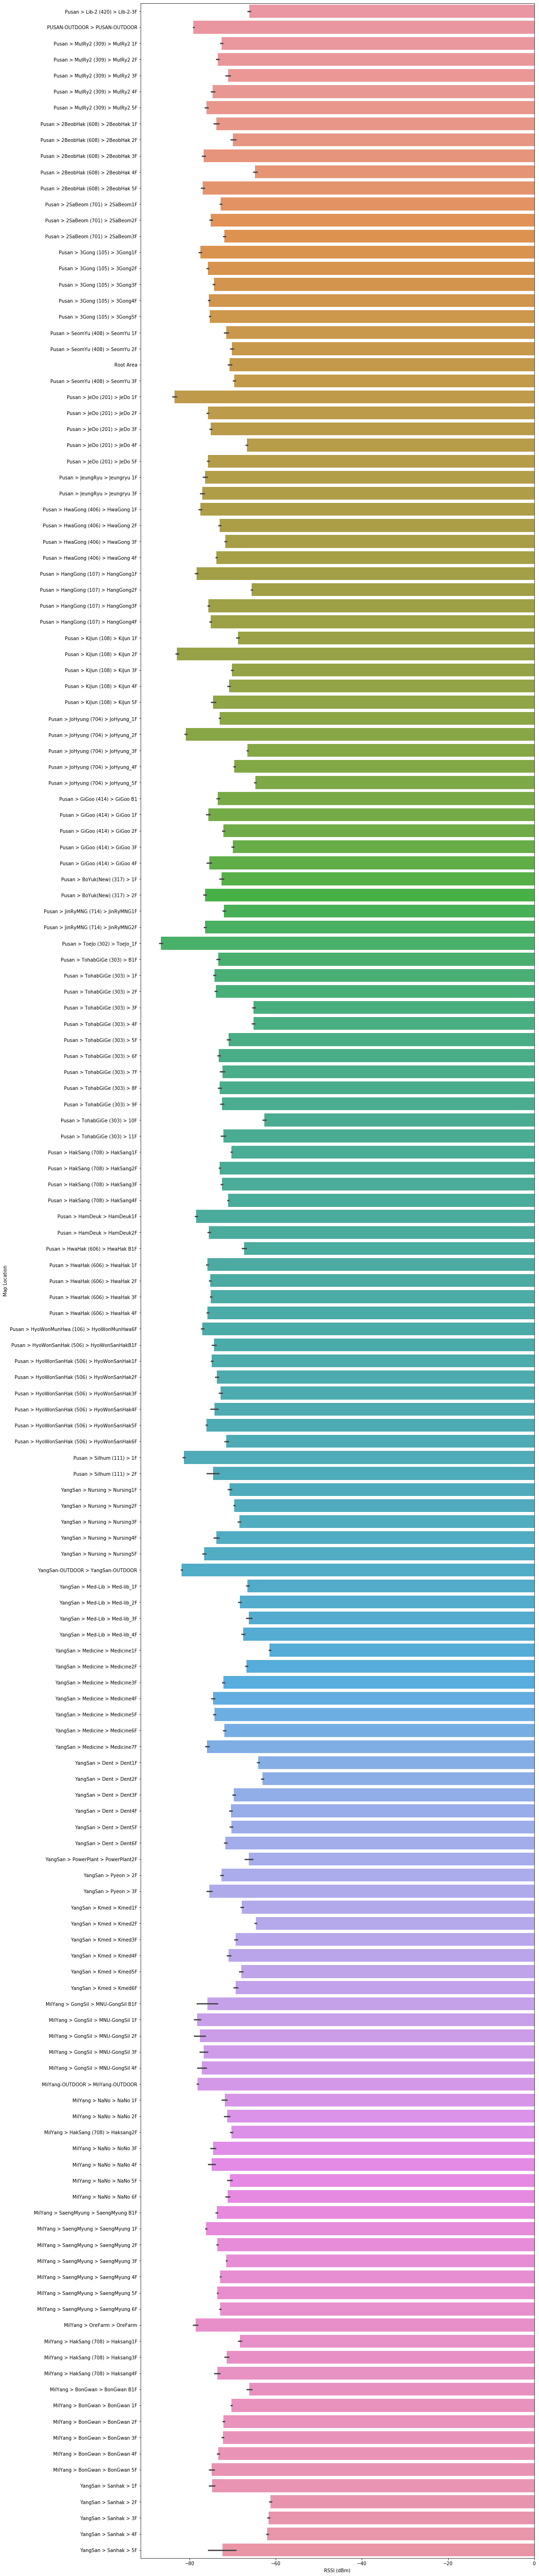

In [7]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15,100)
sns.barplot(data['Utilization']['RSSI (dBm)'] , data['AP']['Map Location'], ax=ax1)

### 패킷 있는 데이터, 패킷 없는 데이터 나누기

In [8]:
# 패킷이 0인것들만 분리
noPacket = data[:][(data['Utilization']['Packets Sent'] == 0) | (data['Utilization']['Packets Received'] == 0) ]

In [9]:
noPacket

l1            AP                                     \
0             l2          Name        MAC Address      IP Address   
2              1  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
4              3  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
5              4  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
6              5  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
7              6  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
...          ...           ...                ...             ...   
3186575  3186574  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186577  3186576  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186578  3186577  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186580  3186579  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186581  3186580  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   

                                                  Client              \
0                          Map Location       IP Address MAC Address   
2        Pusan > Lib-2 (420) > Lib-2-3F    172.21.24.103           1   
4        Pusan > Lib-2 (420) > Lib-2-3F     10.29.101.41           2   
5        Pusan > Lib-2 (420) > Lib-2-3F    172.21.26.200           2   
6        Pusan > Lib-2 (420) > Lib-2-3F     172.21.2.150           3   
7        Pusan > Lib-2 (420) > Lib-2-3F     172.21.2.150           3   
...                                 ...              ...         ...   
3186575           YangSan > Sanhak > 5F   164.125.251.46       19362   
3186577           YangSan > Sanhak > 5F  164.125.251.110        3830   
3186578           YangSan > Sanhak > 5F   164.125.249.96       19738   
3186580           YangSan > Sanhak > 5F  164.125.251.110        3830   
3186581           YangSan > Sanhak > 5F   164.125.249.96       19738   

                                         ... Disassociation Time            \
0          Radio Type      SSID VLAN ID  ...                year month day   
2         802.11b/g/n  PNU-WiFi      17  ...                2020     4  13   
4        802.11a/n/ac   eduroam      17  ...                2020     2  11   
5         802.11b/g/n   eduroam      17  ...                2020     2  11   
6         802.11b/g/n  PNU-WiFi      17  ...                2020     2  11   
7         802.11b/g/n  PNU-WiFi      17  ...                2020     2  11   
...               ...       ...     ...  ...                 ...   ...  ..   
3186575   802.11b/g/n  PNU-WiFi      19  ...                2019     6  17   
3186577  802.11a/n/ac  PNU-WiFi      19  ...                2019     6  26   
3186578   802.11b/g/n  PNU-WiFi      19  ...                2019     6  27   
3186580  802.11a/n/ac  PNU-WiFi      19  ...                2019     6  13   
3186581   802.11b/g/n  PNU-WiFi      19  ...                2019     6  13   

                           Session Duration                        
0       hour minute second             days hours minutes seconds  
2         16     13     20                0     0       5       1  
4         19     42     15                0     0      10       2  
5         19     52     18                0     0       5       1  
6         21      7     40                0     0       5       1  
7         15      5     56                0     0       5       1  
...      ...    ...    ...              ...   ...     ...     ...  
3186575    9     48     53                0     0       5       2  
3186577   12     22     18                0     0       5       1  
3186578    8      1     11                0     0      10       2  
3186580   10     19     30                0     0       5      10  
3186581   10     19     30                0     0       5       9  

[1619537 rows x 43 columns]

In [10]:
noPacket.shape

(1619537, 43)

In [11]:
# 패킷이 0아닌 것들만 분리
yesPacket = data[:][(data['Utilization']['Packets Sent'] != 0) & (data['Utilization']['Packets Received'] != 0) ]

In [12]:
yesPacket

l1            AP                                     \
0             l2          Name        MAC Address      IP Address   
1              0  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
3              2  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
9              8  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
11            10  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
13            12  16AP-420-3-6  00:c8:8b:99:3c:40  172.20.140.136   
...          ...           ...                ...             ...   
3186563  3186562  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186569  3186568  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186576  3186575  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186579  3186578  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   
3186582  3186581  17AP-Y15-5-2  40:01:7a:bb:72:00  172.20.180.160   

                                                  Client              \
0                          Map Location       IP Address MAC Address   
1        Pusan > Lib-2 (420) > Lib-2-3F     172.21.26.30           0   
3        Pusan > Lib-2 (420) > Lib-2-3F    172.21.26.200           2   
9        Pusan > Lib-2 (420) > Lib-2-3F     172.21.2.150           3   
11       Pusan > Lib-2 (420) > Lib-2-3F     172.21.2.150           3   
13       Pusan > Lib-2 (420) > Lib-2-3F    172.21.47.254           4   
...                                 ...              ...         ...   
3186563           YangSan > Sanhak > 5F    164.125.251.9       28328   
3186569           YangSan > Sanhak > 5F  164.125.251.178        3830   
3186576           YangSan > Sanhak > 5F  164.125.251.224        3830   
3186579           YangSan > Sanhak > 5F  164.125.248.255       28328   
3186582           YangSan > Sanhak > 5F  164.125.248.255       28328   

                                         ... Disassociation Time            \
0          Radio Type      SSID VLAN ID  ...                year month day   
1         802.11b/g/n  PNU-WiFi      17  ...                2020     4  18   
3         802.11b/g/n   eduroam      17  ...                2020     2  10   
9         802.11b/g/n  PNU-WiFi      17  ...                2020     2  13   
11        802.11b/g/n  PNU-WiFi      17  ...                2020     2  13   
13       802.11a/n/ac  PNU-WiFi      17  ...                2020     2  11   
...               ...       ...     ...  ...                 ...   ...  ..   
3186563  802.11a/n/ac  PNU-WiFi      19  ...                2019     9  18   
3186569  802.11a/n/ac  PNU-WiFi      19  ...                2019     7  30   
3186576   802.11b/g/n  PNU-WiFi      19  ...                2019     6  28   
3186579   802.11b/g/n  PNU-WiFi      19  ...                2019     6  12   
3186582   802.11b/g/n  PNU-WiFi      19  ...                2019     6  13   

                           Session Duration                        
0       hour minute second             days hours minutes seconds  
1         11     37     16                0     0       5       1  
3         15      1     52                0     0      15       4  
9         15     28      2                0     0      15       3  
11        21      4     37                0     0      30       8  
13        18     26     54                0     5      21      31  
...      ...    ...    ...              ...   ...     ...     ...  
3186563   22     13      4                0     0      10       3  
3186569   10     38      9                0     0      10       3  
3186576   10     40      9                0     0       5       0  
3186579   11     49     52                0     1      37      51  
3186582   11     11     33                0     1      27      41  

[1567045 rows x 43 columns]

In [13]:
yesPacket.shape

(1567045, 43)

### 1. 패킷 없는 데이터
* 송수신간 거리, 주변 장애물등에 따라 전송 세기가 약해질 경우 SNR값이 작아진다.

#### 1) 패킷 없는데 데이터 리트라이가 많다

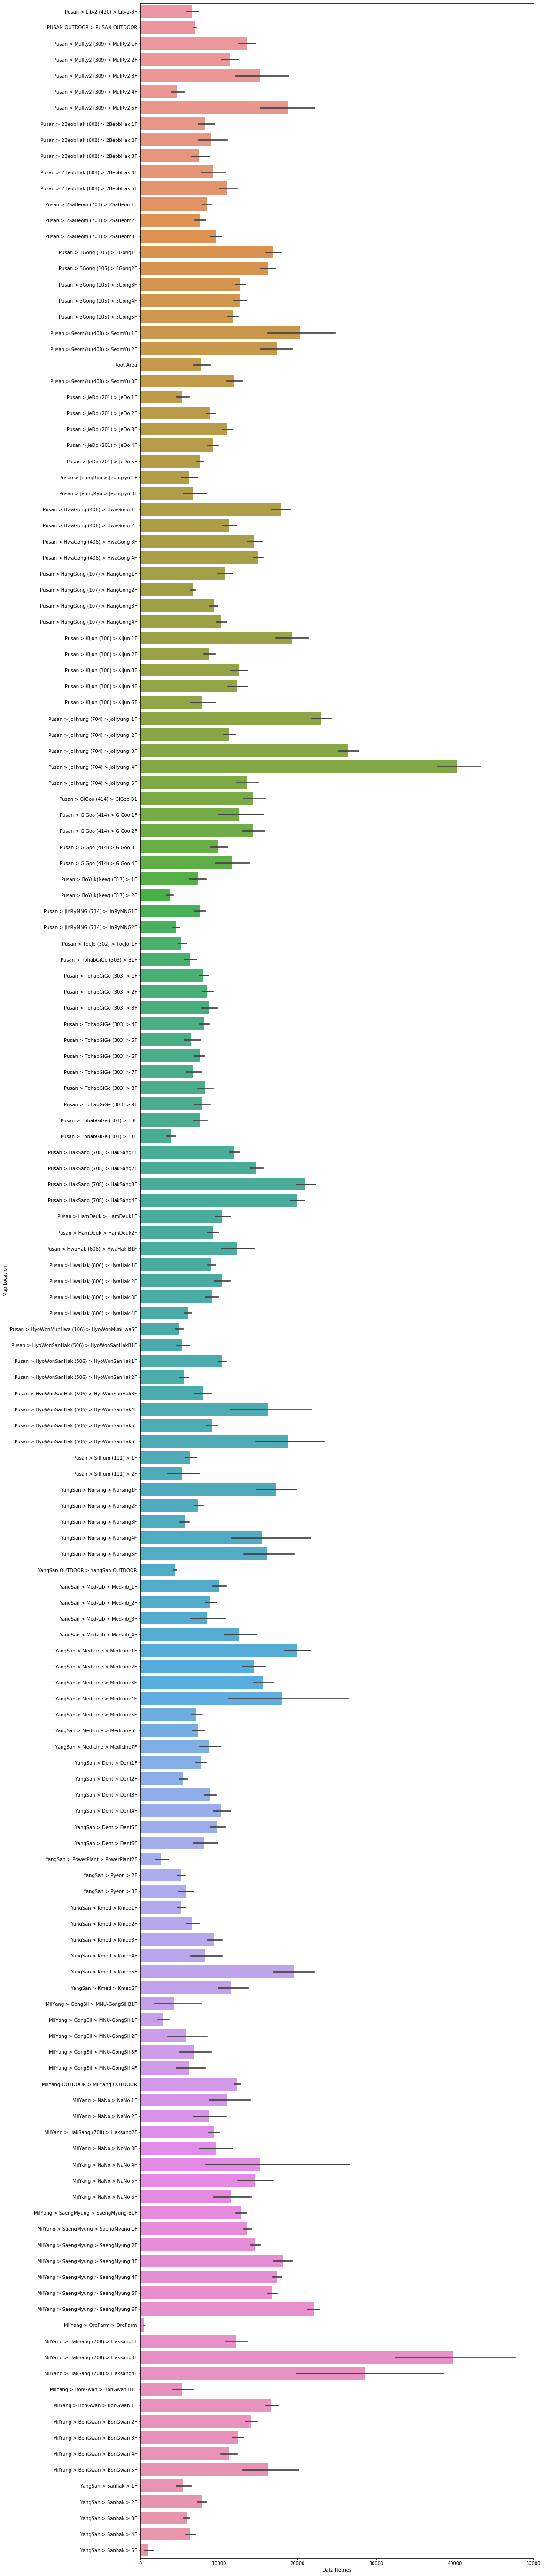

In [14]:
# 패킷 없는데 데이터 리트라이가 많다 -> 오류로 패킷을 못보내서 계속 리트라이 한거
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15,100)
sns.barplot(noPacket['Utilization']['Data Retries'] , noPacket['AP']['Map Location'], ax=ax1)

#### 2) SNR과 리트라이 관계
SNR과 리트라이의 관계 <br> 
SNR이 좋은데 리트라이가 많다 -> 이상하다<br> 
SNR 좋음 - 리트라이 많다 /// 비례관계

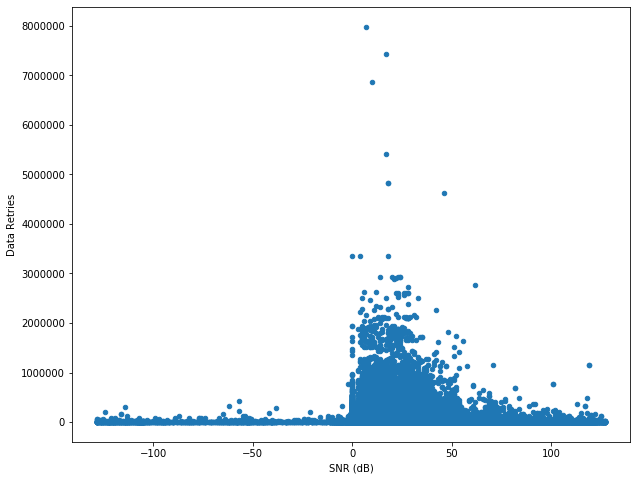

In [15]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,8)

noPacket['Utilization'].plot.scatter(x='SNR (dB)', y='Data Retries',ax = ax1);

#### 3) RSSI와 리트라이 관계
RSSI 안좋음 - 리트라이 많음 /// 반비례 관계

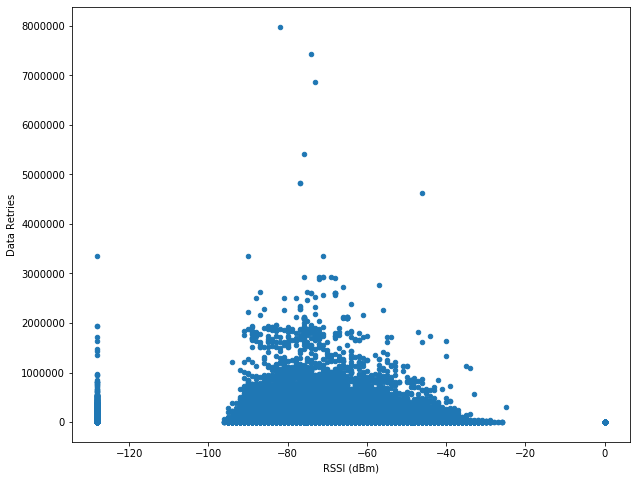

In [16]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,8)

noPacket['Utilization'].plot.scatter(x='RSSI (dBm)', y='Data Retries',ax = ax1);

RSSI랑 SNR 관계
- -90~-80사이 snr다양함
- 그외에 비례함

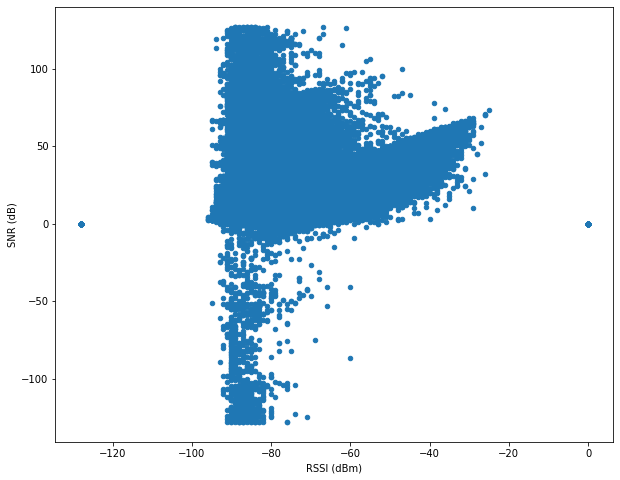

In [17]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,8)

noPacket['Utilization'].plot.scatter(x='RSSI (dBm)', y='SNR (dB)',ax = ax1);

### 2. 패킷 있는 데이터

#### 1) 패킷 있는데 데이터 리트라이가 많다
패킷이 있는데 리트라이 많이한다 -> RSSI 괜찮은지 <br>
데이터가 보내지는데 리트라이가 많다 - RSSI괜찮은거면 AP가 이상한거


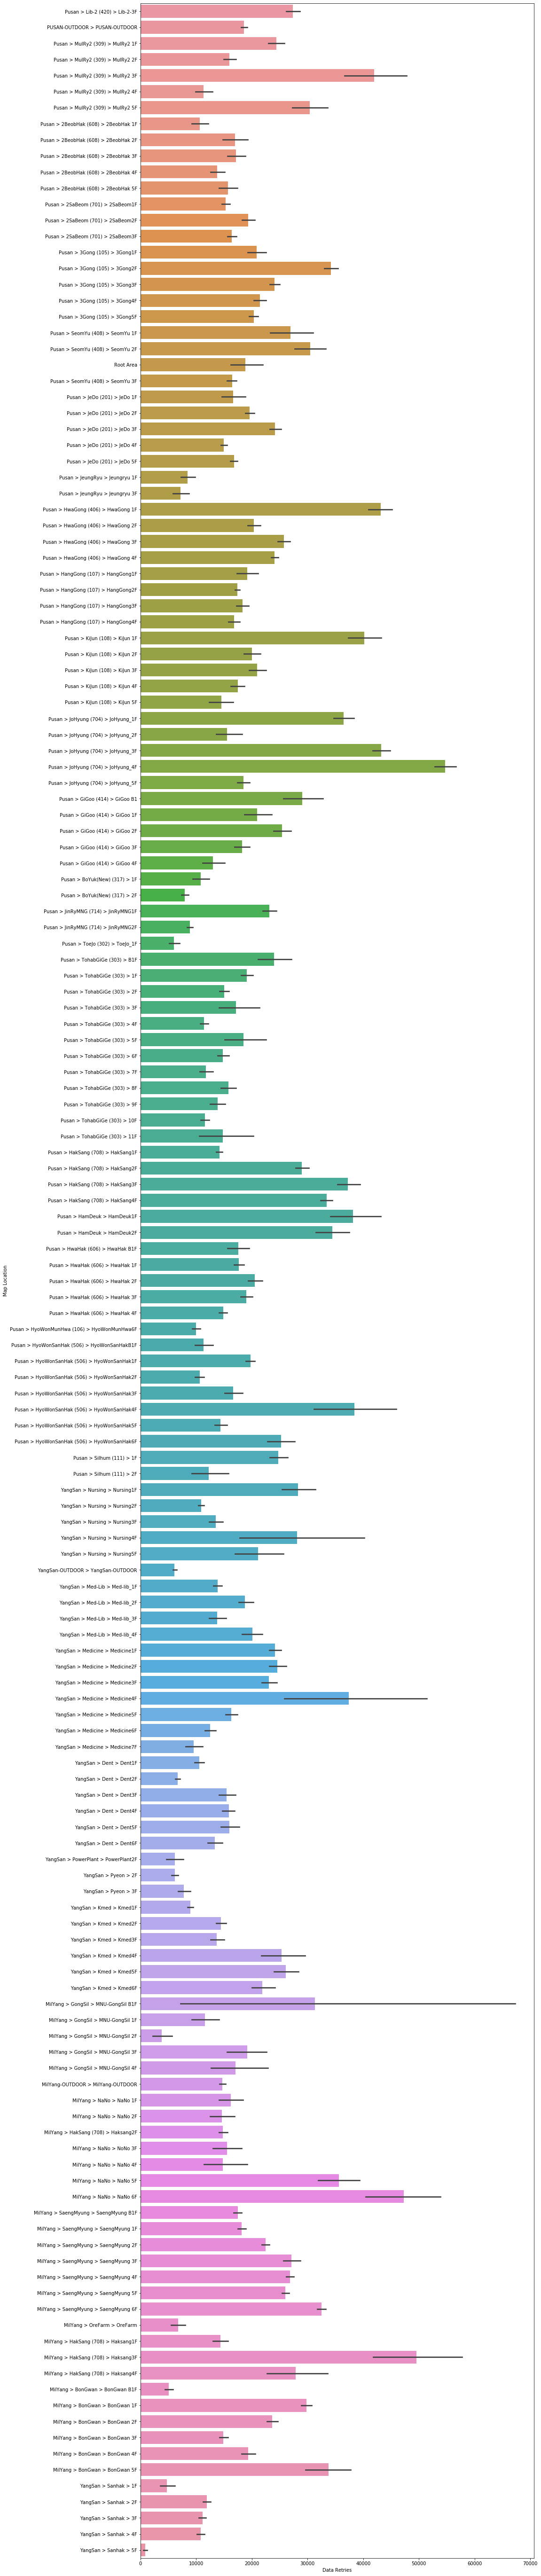

In [18]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(15,100)
sns.barplot(yesPacket['Utilization']['Data Retries'] , yesPacket['AP']['Map Location'], ax=ax1)

#### 2) SNR과 리트라이 관계

SNR과 리트라이의 관계 <br>
SNR이 좋은데 리트라이가 많다 -> 이상하다<br>
SNR 좋음 - 리트라이 많다 /// 비례관계

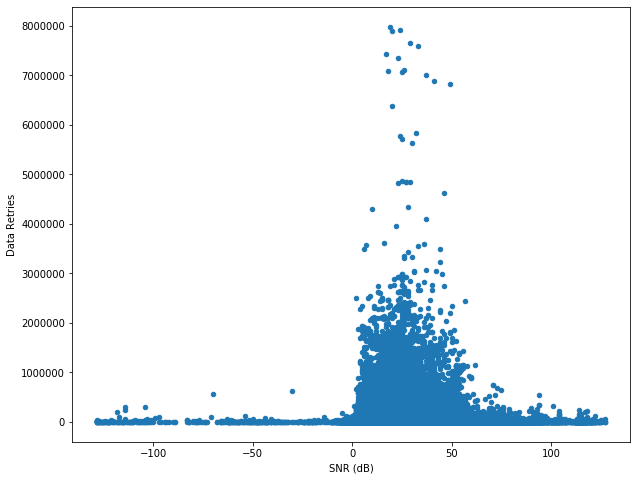

In [19]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,8)

yesPacket['Utilization'].plot.scatter(x='SNR (dB)', y='Data Retries',ax = ax1);

#### 3) RSSI와 리트라이 관계
RSSI 안좋음 - 리트라이 많음 /// 반비례 관계

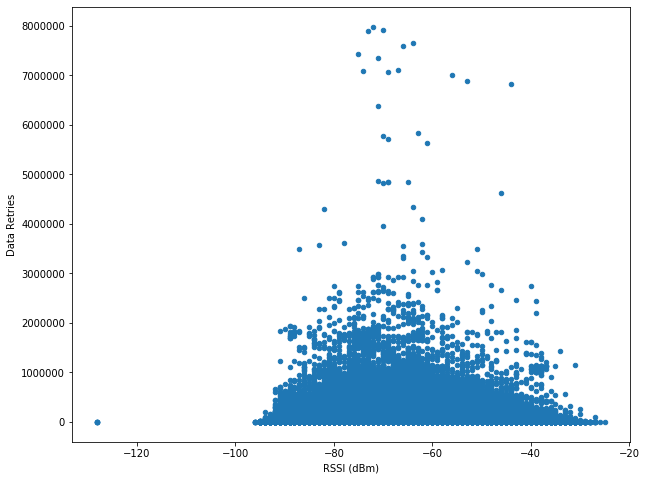

In [20]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,8)

yesPacket['Utilization'].plot.scatter(x='RSSI (dBm)', y='Data Retries',ax = ax1);

#### RSSI랑 SNR 관계
- -90~-80사이 snr다양함
- 그외에 비례함

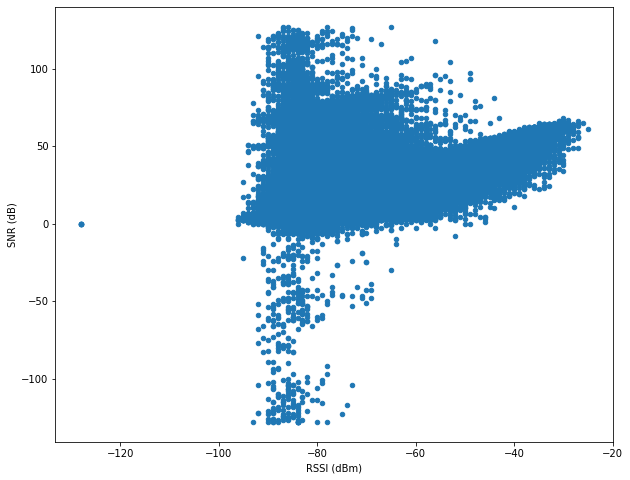

In [21]:
figure, (ax1) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,8)

yesPacket['Utilization'].plot.scatter(x='RSSI (dBm)', y='SNR (dB)',ax = ax1);

### ->  패킷 유무 관계없이 SNR RSSI비례
### ->  패킷 유무 관계없이 SNR RSSI랑 리트라이 관계 불확실 ->  [SNR RSSI]랑 리트라이 비교해보기

### * RSSI, SNR 음수 바꾸기

[노패킷]<br>
SNR , RSSI 양수로 바꾸기

In [22]:
noPacket['Utilization']['SNR (dB)'].min()

-128

In [23]:
nosnr = noPacket['Utilization']['SNR (dB)'] + 130

In [24]:
noPacket['Utilization']['RSSI (dBm)'].min(0)

-128

In [25]:
norssi = noPacket['Utilization']['RSSI (dBm)'] + 130

In [26]:
noPacket_SNR_RSSI = np.log(norssi) + np.log(nosnr)

In [57]:
noPacket['Signal'] = noPacket_SNR_RSSI

In [58]:
noPacket['Signal'] 

2          8.871786
4          9.134754
5          9.124129
6          9.365633
7          9.299632
             ...   
3186575    9.136909
3186577    9.491300
3186578    9.491300
3186580    9.491300
3186581    9.491300
Name: Signal, Length: 1619537, dtype: float64

[패킷있는거] <br>
SNR , RSSI 양수로 바꾸기

In [28]:
yesPacket['Utilization']['SNR (dB)'].min()

-128

In [29]:
yessnr = yesPacket['Utilization']['SNR (dB)'] + 130

In [30]:
yesPacket['Utilization']['RSSI (dBm)'].min(0)

-128

In [31]:
yesrssi = yesPacket['Utilization']['RSSI (dBm)'] + 130

In [47]:
yesPacket_SNR_RSSI = np.log(yesrssi) + np.log(yessnr)

In [48]:
yesPacket_SNR_RSSI

1          9.406565
3          9.073718
9          9.372459
11         9.348013
13         9.170560
             ...   
3186563    9.277251
3186569    8.770284
3186576    8.846497
3186579    8.762802
3186582    8.762802
Length: 1567045, dtype: float64

In [114]:
yesPacket['Signal'] = yesPacket_SNR_RSSI

In [115]:
yesPacket['Signal']

1          9.406565
3          9.073718
9          9.372459
11         9.348013
13         9.170560
             ...   
3186563    9.277251
3186569    8.770284
3186576    8.846497
3186579    8.762802
3186582    8.762802
Name: Signal, Length: 1567045, dtype: float64

### 시그널 - 데이터 재전송 그래프

#### 1) 패킷 있는 데이터

건물별로 그리고싶다

In [116]:
yesPacket['AP']['Map Location'].unique()

array(['Pusan > Lib-2 (420) > Lib-2-3F', 'PUSAN-OUTDOOR > PUSAN-OUTDOOR',
       'Pusan > MulRy2 (309) > MulRy2 1F',
       'Pusan > MulRy2 (309) > MulRy2 2F',
       'Pusan > MulRy2 (309) > MulRy2 3F',
       'Pusan > MulRy2 (309) > MulRy2 4F',
       'Pusan > MulRy2 (309) > MulRy2 5F',
       'Pusan > 2BeobHak (608) > 2BeobHak 1F',
       'Pusan > 2BeobHak (608) > 2BeobHak 2F',
       'Pusan > 2BeobHak (608) > 2BeobHak 3F',
       'Pusan > 2BeobHak (608) > 2BeobHak 4F',
       'Pusan > 2BeobHak (608) > 2BeobHak 5F',
       'Pusan > 2SaBeom (701) > 2SaBeom1F',
       'Pusan > 2SaBeom (701) > 2SaBeom2F',
       'Pusan > 2SaBeom (701) > 2SaBeom3F',
       'Pusan > 3Gong (105) > 3Gong1F', 'Pusan > 3Gong (105) > 3Gong2F',
       'Pusan > 3Gong (105) > 3Gong3F', 'Pusan > 3Gong (105) > 3Gong4F',
       'Pusan > 3Gong (105) > 3Gong5F',
       'Pusan > SeomYu (408) > SeomYu 1F',
       'Pusan > SeomYu (408) > SeomYu 2F', 'Root Area',
       'Pusan > SeomYu (408) > SeomYu 3F', 'Pusan > JeDo (2

In [124]:
yes_signal = pd.concat([yesPacket['AP']['Map Location'],yesPacket['Utilization']['Data Retries'], yesPacket['Signal']], axis=1)

In [131]:
yes_signal

,Map Location,Data Retries,Signal
1,Pusan > Lib-2 (420) > Lib-2-3F,601,9.406565
3,Pusan > Lib-2 (420) > Lib-2-3F,9352,9.073718
9,Pusan > Lib-2 (420) > Lib-2-3F,1914,9.372459
11,Pusan > Lib-2 (420) > Lib-2-3F,118122,9.348013
13,Pusan > Lib-2 (420) > Lib-2-3F,1278,9.170560
...,...,...,...
3186563,YangSan > Sanhak > 5F,71,9.277251
3186569,YangSan > Sanhak > 5F,763,8.770284
3186576,YangSan > Sanhak > 5F,1513,8.846497
3186579,YangSan > Sanhak > 5F,2200,8.762802


In [156]:
johyung = yes_signal[yes_signal['Map Location'].str.contains('JoHyung')]
HyoWonSanHak = yes_signal[yes_signal['Map Location'].str.contains('HyoWonSanHak')]
HakSang = yes_signal[yes_signal['Map Location'].str.contains('HakSang')]

In [157]:
HyoWonSanHak

,Map Location,Data Retries,Signal
1735991,Pusan > HyoWonSanHak (506) > HyoWonSanHakB1F,88037,9.030256
1735992,Pusan > HyoWonSanHak (506) > HyoWonSanHakB1F,181587,9.019785
1735993,Pusan > HyoWonSanHak (506) > HyoWonSanHakB1F,758,9.189729
1735998,Pusan > HyoWonSanHak (506) > HyoWonSanHakB1F,859,9.097396
1735999,Pusan > HyoWonSanHak (506) > HyoWonSanHakB1F,881,9.090881
...,...,...,...
1800250,Pusan > HyoWonSanHak (506) > HyoWonSanHak6F,1137,9.029298
1800251,Pusan > HyoWonSanHak (506) > HyoWonSanHak6F,292,9.435482
1800252,Pusan > HyoWonSanHak (506) > HyoWonSanHak6F,7879,9.077723
1800253,Pusan > HyoWonSanHak (506) > HyoWonSanHak6F,8584,9.202308


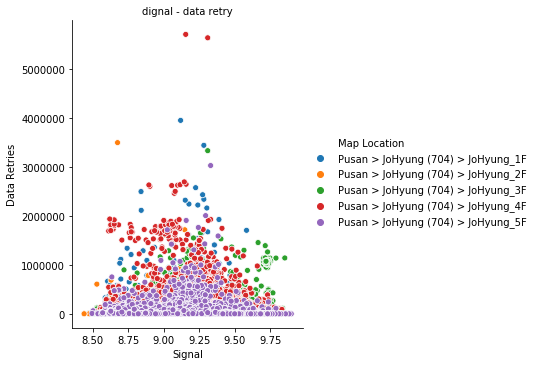

In [143]:
# Scatter Plot with regression line by seaborn regplot()
sns.relplot(x='Signal', y='Data Retries', hue='Map Location', data=johyung)
plt.title('dignal - data retry', fontsize=10)
plt.show()

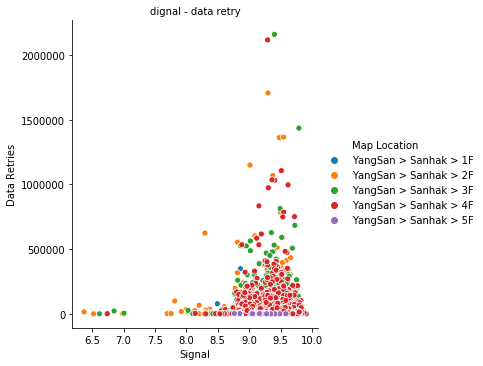

In [149]:
# Scatter Plot with regression line by seaborn regplot()
sns.relplot(x='Signal', y='Data Retries', hue='Map Location', data=Sanhak)
plt.title('dignal - data retry', fontsize=10)
plt.show()

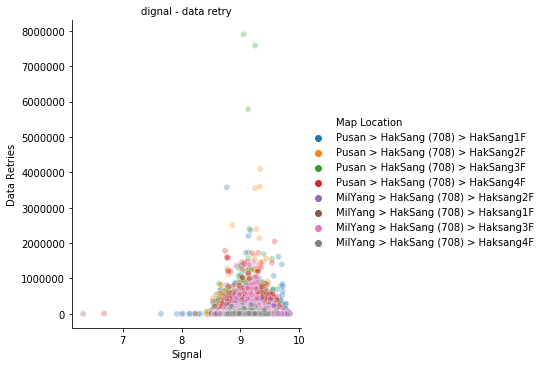

In [163]:
# Scatter Plot with regression line by seaborn regplot()
sns.relplot(x='Signal', y='Data Retries', hue='Map Location', data=HakSang, alpha = 0.3)
plt.title('dignal - data retry', fontsize=10)
plt.show()

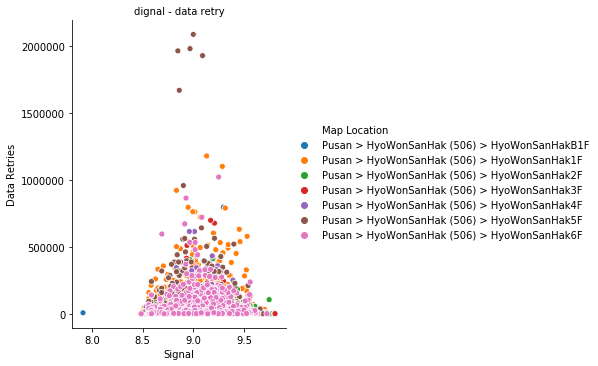

In [161]:
# Scatter Plot with regression line by seaborn regplot()
sns.relplot(x='Signal', y='Data Retries', hue='Map Location', data=HyoWonSanHak)
plt.title('dignal - data retry', fontsize=10)
plt.show()

#### 여기서 잠깐 관계 보기

In [38]:
# # 데이터리트라이랑 뭐랑 제일 관계 많은지
# noPacket.corr()
# # top_corr=data[corr.nlargest(40,'Data Retries')['Data Retries'].index].corr()
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(20,20)
# sns.heatmap(noPacket, annot=True, ax=ax1)

In [ ]:
# # 라디오타입 관계있ㄴ ㅏ.
# figure, ax1 = plt.subplots(nrows=1)
# figure.set_size_inches(5,5)
# sns.barplot(data['Client']['Radio Type'], data['Utilization']['Data Retries'], ax=ax1)


In [ ]:
# radiotype = data['Client']['Radio Type']

## 이용 서비스 구분 가능한지

In [ ]:
xs = pd.read_excel('data/iphoneXS.xlsx', sheet_name = 'Sheet1')

In [ ]:
xs

In [ ]:
xs.dropna(axis=0)

In [ ]:
xs[xs['Info'].str.contains('Payload') == True]

In [ ]:
data['Client']['Endpoint Type']

In [ ]:
iphone = data['Client']['Endpoint Type'].str.contains('iPhone')

In [ ]:
data[:][iphone]